In [1]:
import numpy as np
import pandas as pd

In [2]:
string_data = pd.Series(['a','b',np.nan,'d'])

In [3]:
string_data


0      a
1      b
2    NaN
3      d
dtype: object

In [5]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [7]:
#None 可以成为 nan
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

## 缺失值处理
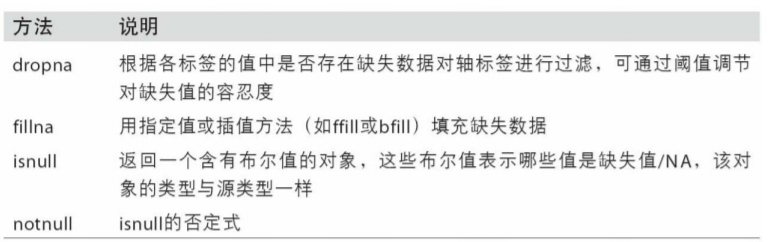

## 删除


In [8]:
from numpy import nan as NA
data = pd.Series([1,NA,3.5,NA,7])

In [9]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [10]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [11]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [15]:
data = pd.DataFrame([[1.,6.5,3.],[1.,NA,NA],[NA,NA,NA],[NA,0,0]])

In [16]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,0.0,0.0


In [17]:
# dropna 会 删除所有包含NA 的行 
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [18]:
# how = 'all' 只会删除 全为 nan 的行
data.dropna(how = 'all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,0.0,0.0


In [20]:
data.dropna(axis=1) #列

""
0
1
2
3


In [21]:
df = pd.DataFrame(np.random.randn(7,3))
df.iloc[:4,1]= NA
df.iloc[:2,2] = NA

In [22]:
df

,0,1,2
0,0.163976,NaN,NaN
1,-1.848336,NaN,NaN
2,-1.331400,NaN,-0.781122
3,0.281709,NaN,0.382963
4,-1.009601,0.480653,0.174542
5,-1.528719,0.308499,2.110891
6,0.377419,1.408253,-1.604820


In [23]:
df.dropna()

,0,1,2
4,-1.009601,0.480653,0.174542
5,-1.528719,0.308499,2.110891
6,0.377419,1.408253,-1.604820


In [32]:
df.dropna(thresh =2)#thresh=n，保留至少有 n 个非 NA 数的行

,0,1,2
2,-1.331400,NaN,-0.781122
3,0.281709,NaN,0.382963
4,-1.009601,0.480653,0.174542
5,-1.528719,0.308499,2.110891
6,0.377419,1.408253,-1.604820


## 填充
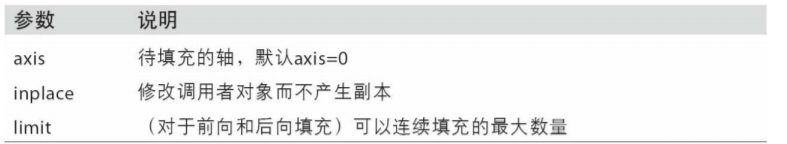

In [33]:
df

,0,1,2
0,0.163976,NaN,NaN
1,-1.848336,NaN,NaN
2,-1.331400,NaN,-0.781122
3,0.281709,NaN,0.382963
4,-1.009601,0.480653,0.174542
5,-1.528719,0.308499,2.110891
6,0.377419,1.408253,-1.604820


In [34]:
df.fillna(2)

,0,1,2
0,0.163976,2.000000,2.000000
1,-1.848336,2.000000,2.000000
2,-1.331400,2.000000,-0.781122
3,0.281709,2.000000,0.382963
4,-1.009601,0.480653,0.174542
5,-1.528719,0.308499,2.110891
6,0.377419,1.408253,-1.604820


In [35]:
df.fillna({1:0.5,2:2})

,0,1,2
0,0.163976,0.500000,2.000000
1,-1.848336,0.500000,2.000000
2,-1.331400,0.500000,-0.781122
3,0.281709,0.500000,0.382963
4,-1.009601,0.480653,0.174542
5,-1.528719,0.308499,2.110891
6,0.377419,1.408253,-1.604820


In [36]:
df = pd.DataFrame(np.random.randn(6,3))
df.iloc[2:,1]= NA
df.iloc[4:,2] = NA
df

,0,1,2
0,0.064625,0.249693,-0.369224
1,2.178120,-1.024794,0.151300
2,0.579985,NaN,-0.552677
3,-1.811736,NaN,2.469695
4,0.797429,NaN,NaN
5,-0.365074,NaN,NaN


In [37]:
df.fillna(method = 'ffill')

,0,1,2
0,0.064625,0.249693,-0.369224
1,2.178120,-1.024794,0.151300
2,0.579985,-1.024794,-0.552677
3,-1.811736,-1.024794,2.469695
4,0.797429,-1.024794,2.469695
5,-0.365074,-1.024794,2.469695


In [38]:
df.fillna(method = 'ffill',limit = 2)

,0,1,2
0,0.064625,0.249693,-0.369224
1,2.178120,-1.024794,0.151300
2,0.579985,-1.024794,-0.552677
3,-1.811736,-1.024794,2.469695
4,0.797429,NaN,2.469695
5,-0.365074,NaN,2.469695


In [40]:
data  = pd.Series([1,NA,3.5,NA,7])
data.fillna(data.mean())#均值填充

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## 移除重复数据


In [41]:
data = pd.DataFrame({'k1':['one','two']*3+['two'],
                    'k2':[1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [42]:
data.duplicated()#表示各行是否是重复行

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [43]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [44]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])#仅 根据 k1 过滤

,k1,k2,v1
0,one,1,0
1,two,1,1


In [45]:
data.drop_duplicates(['k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [48]:
data.drop_duplicates(['k1','k2'],keep = 'last') #保留最后一个 

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


## 利用函数或映射

In [49]:
data = pd.DataFrame({'food':['bacon','orange','c','d','e','f'],'price':[1,2,3,4,5,3]})

In [50]:
data

,food,price
0,bacon,1
1,orange,2
2,c,3
3,d,4
4,e,5
5,f,3


In [54]:
food_to ={
    'bacon':'pig',
    'orange':'vb',
    'c':'cow',
    'd':'cow',
    'e':'vb',
    'f':'pig'
}


In [55]:
lowercased = data['food'].str.lower()
lowercased

0     bacon
1    orange
2         c
3         d
4         e
5         f
Name: food, dtype: object

In [56]:
data['to'] = lowercased.map(food_to)
data

,food,price,to
0,bacon,1,pig
1,orange,2,vb
2,c,3,cow
3,d,4,cow
4,e,5,vb
5,f,3,pig


In [57]:
data['food'].map(lambda x:food_to[x.lower()])

0    pig
1     vb
2    cow
3    cow
4     vb
5    pig
Name: food, dtype: object

## 替换值


In [58]:
data = pd.Series([1,-99,2,-99,-100,3])
data

0      1
1    -99
2      2
3    -99
4   -100
5      3
dtype: int64

In [59]:
data.replace(-99,np.nan)

0      1.0
1      NaN
2      2.0
3      NaN
4   -100.0
5      3.0
dtype: float64

In [60]:
data.replace([-99,-100],np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [61]:
data.replace({-99:np.nan,-100:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## 重命名轴索引

In [64]:
data = pd.DataFrame(np.arange(12).reshape((3,4)),
                    index = ['a','b','c'],
                    columns=['1','2','3','4'])
data

,1,2,3,4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [65]:
transform = lambda x:x[:4].upper()

In [68]:
data.index = data.index.map(transform)
data

,1,2,3,4
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


In [69]:
data.rename(index = str.title,columns=str.upper)

,1,2,3,4
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


In [75]:
data.rename(index ={'A':'AA'},columns = {'1' : 'one'})

,one,2,3,4
AA,0,1,2,3
B,4,5,6,7
C,8,9,10,11


In [77]:
data.rename(index ={'A':'AA'},columns = {'1' : 'one'},inplace=True)
data

,one,2,3,4
AA,0,1,2,3
B,4,5,6,7
C,8,9,10,11


## 离散化和面元划分


In [78]:
ages = [20,22,25,27,21,23,37,31,61,34,41,45]


In [82]:
bins = [18,25,35,60,100]

In [84]:
#分段 离散化
cats = pd.cut(ages,bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (25, 35], (35, 60], (35, 60]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [85]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 1, 2, 2], dtype=int8)

In [86]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [87]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [90]:
pd.cut(ages,bins,right = False)# 区间开闭 right = false 右侧开区间

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [25, 35), [35, 60), [35, 60)]
Length: 12
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [91]:
group_names = ['a','b','c','d']
pd.cut(ages,bins,labels = group_names)

[a, a, a, b, a, ..., b, d, b, c, c]
Length: 12
Categories (4, object): [a < b < c < d]

In [97]:
data = np.random.rand(20)
cut = pd.cut(data,4,precision=2)# 根据最值计算等长的 面元 取小数点后两位 
cut

[(0.74, 0.96], (0.29, 0.52], (0.52, 0.74], (0.74, 0.96], (0.74, 0.96], ..., (0.068, 0.29], (0.068, 0.29], (0.52, 0.74], (0.74, 0.96], (0.74, 0.96]]
Length: 20
Categories (4, interval[float64]): [(0.068, 0.29] < (0.29, 0.52] < (0.52, 0.74] < (0.74, 0.96]]

In [96]:
pd.value_counts(cut)

(0.25, 0.49]     6
(0.74, 0.98]     5
(0.49, 0.74]     5
(0.005, 0.25]    4
dtype: int64

In [99]:
pd.qcut(data,[0,0.1,0.5,0.9,1.])

[(0.923, 0.961], (0.105, 0.626], (0.626, 0.923], (0.923, 0.961], (0.626, 0.923], ..., (0.105, 0.626], (0.0679, 0.105], (0.626, 0.923], (0.626, 0.923], (0.626, 0.923]]
Length: 20
Categories (4, interval[float64]): [(0.0679, 0.105] < (0.105, 0.626] < (0.626, 0.923] < (0.923, 0.961]]

## 检测和过滤异常值


In [2]:
data = pd.DataFrame(np.random.randn(1000,4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.011612,-0.012774,0.015808,-0.052366
std,0.982085,0.964648,0.984970,0.996422
min,-3.689601,-3.766909,-3.115712,-3.338832
25%,-0.649753,-0.678222,-0.619261,-0.746167
50%,0.023712,0.022521,-0.001204,-0.056228
75%,0.697297,0.678459,0.695980,0.577969
max,2.869435,2.775843,2.745733,2.810779


In [3]:
col = data[2]
col[np.abs(col)>3] #找出第二列 绝对值大于三的数

129   -3.115712
Name: 2, dtype: float64

In [4]:
data[(np.abs(data) >3).any(1)] ## 选出所有 abs 大于3 的行

,0,1,2,3
58,1.275889,-0.078697,-0.950304,-3.065697
69,0.947331,0.294049,0.538310,-3.122217
129,-1.160485,-1.053318,-3.115712,1.380659
289,-0.644847,-3.766909,-1.577700,0.440145
820,0.174996,-0.422050,0.643646,-3.338832
906,-3.689601,0.458547,-0.500565,-1.685248


In [8]:
data[np.abs(data) > 3] = np.sign(data)* 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012302,-0.012007,0.015924,-0.051839
std,0.979722,0.961962,0.984609,0.994794
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.649753,-0.678222,-0.619261,-0.746167
50%,0.023712,0.022521,-0.001204,-0.056228
75%,0.697297,0.678459,0.695980,0.577969
max,2.869435,2.775843,2.745733,2.810779


In [9]:
np.sign(data).head()

,0,1,2,3
0,-1.0,-1.0,1.0,-1.0
1,-1.0,-1.0,1.0,1.0
2,-1.0,1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0
4,-1.0,1.0,-1.0,-1.0


## 排列和随机采样


In [10]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5,4)))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [12]:
sampler = np.random.permutation(5)
sampler

array([0, 4, 2, 3, 1])

In [13]:
df.take(sampler) # 行替换成 sampler

,0,1,2,3
0,0,1,2,3
4,16,17,18,19
2,8,9,10,11
3,12,13,14,15
1,4,5,6,7


In [15]:
df.sample(3)

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
2,8,9,10,11


## 指标矩阵